In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Eigenface/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Eigenface


# 1. Eigenface for face recognition

## a.Download the data

In [ ]:
train_df = pd.read_csv("faces/train.txt",header=None, low_memory=False)
test_df = pd.read_csv("faces/test.txt", header=None, low_memory=False)
train_df

,0
0,./faces/images/person01_63.png 1
1,./faces/images/person01_14.png 1
2,./faces/images/person01_09.png 1
3,./faces/images/person01_05.png 1
4,./faces/images/person01_01.png 1
...,...
535,./faces/images/person10_33.png 10
536,./faces/images/person10_46.png 10
537,./faces/images/person10_19.png 10
538,./faces/images/person10_64.png 10


## b. Load the training and the test sets

In [ ]:
def plot_face(data):
  plt.imshow(data.reshape(50,50), cmap = cm.Greys_r)
  plt.show()

(540, 2500) (540,)


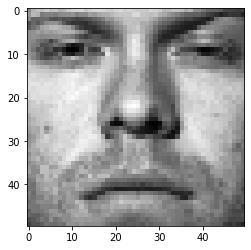

In [ ]:
# Loading the training set into the matrix X

import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
import imageio
%matplotlib inline
train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = imageio.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)
print(train_data.shape, train_labels.shape)

plot_face(train_data[10, :])


(100, 2500) (100,)


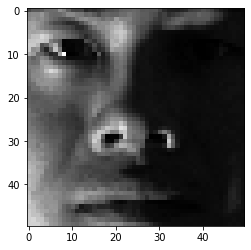

In [ ]:
# Loading the test set into a matrix

test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    im = imageio.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)
print(test_data.shape, test_labels.shape)

plot_face(test_data[10, :])

In [ ]:
train_data

array([[  5.,   7.,   7., ...,  13.,  20.,  31.],
       [ 65.,  74.,  74., ..., 111., 106.,  96.],
       [101., 116., 130., ...,  61.,  52.,  41.],
       ...,
       [107., 115., 108., ...,  26.,  23.,  24.],
       [255., 255., 255., ...,  22.,  22.,  22.],
       [174., 178., 202., ...,  28.,  26.,  28.]])

In [ ]:
test_data

array([[107., 113., 127., ...,  37.,  38.,  22.],
       [111., 138., 153., ...,  30.,  25.,  22.],
       [111., 106.,  58., ...,  12.,  15.,  11.],
       ...,
       [ 10.,  11.,  11., ..., 177., 187., 169.],
       [136., 111., 106., ...,  17.,  18.,  17.],
       [ 51.,  36.,  32., ..., 161., 138., 132.]])

## c. Average Face

In [ ]:
avg = np.add.reduce(train_data)
avg_face = avg/(len(train_data))
avg_face

array([59.25185185, 56.10185185, 52.42222222, ..., 67.22222222,
       64.61851852, 59.27592593])

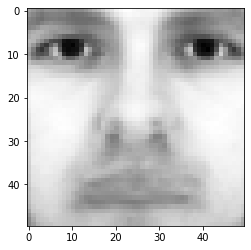

In [ ]:
plot_face(avg_face)

In [ ]:
avg_face.shape

(2500,)

## d. Mean Substraction

In [ ]:
def mean_subtract(data, average_face):
  return data - average_face

In [ ]:
train_subtracted = mean_subtract(train_data, avg_face)
test_subtracted =  mean_subtract(test_data, avg_face)

In [ ]:
train_subtracted

array([[-54.25185185, -49.10185185, -45.42222222, ..., -54.22222222,
        -44.61851852, -28.27592593],
       [  5.74814815,  17.89814815,  21.57777778, ...,  43.77777778,
         41.38148148,  36.72407407],
       [ 41.74814815,  59.89814815,  77.57777778, ...,  -6.22222222,
        -12.61851852, -18.27592593],
       ...,
       [ 47.74814815,  58.89814815,  55.57777778, ..., -41.22222222,
        -41.61851852, -35.27592593],
       [195.74814815, 198.89814815, 202.57777778, ..., -45.22222222,
        -42.61851852, -37.27592593],
       [114.74814815, 121.89814815, 149.57777778, ..., -39.22222222,
        -38.61851852, -31.27592593]])

In [ ]:
test_subtracted

array([[ 47.74814815,  56.89814815,  74.57777778, ..., -30.22222222,
        -26.61851852, -37.27592593],
       [ 51.74814815,  81.89814815, 100.57777778, ..., -37.22222222,
        -39.61851852, -37.27592593],
       [ 51.74814815,  49.89814815,   5.57777778, ..., -55.22222222,
        -49.61851852, -48.27592593],
       ...,
       [-49.25185185, -45.10185185, -41.42222222, ..., 109.77777778,
        122.38148148, 109.72407407],
       [ 76.74814815,  54.89814815,  53.57777778, ..., -50.22222222,
        -46.61851852, -42.27592593],
       [ -8.25185185, -20.10185185, -20.42222222, ...,  93.77777778,
         73.38148148,  72.72407407]])

## e. Eigenface

In [ ]:
def get_eigenvectors(X):
  covariance = np.dot(X.transpose(), X)
  U, Sigma, eigenvectors = np.linalg.svd(covariance, full_matrices=False)

  return eigenvectors


In [ ]:
covariance = np.dot(train_subtracted.transpose(), train_subtracted)
covariance.shape

(2500, 2500)

In [ ]:
U, Sigma, eigenvectors = np.linalg.svd(covariance, full_matrices=False)

In [ ]:
eigenvectors

array([[ 8.56324779e-05,  1.02866364e-03,  3.08553648e-03, ...,
         1.04812368e-02,  8.32289224e-03,  6.59057671e-03],
       [ 2.59457196e-02,  2.32848928e-02,  2.10968387e-02, ...,
        -2.43844653e-02, -2.44582450e-02, -2.32785651e-02],
       [-7.77077554e-03, -5.35923444e-03, -5.00431250e-03, ...,
         2.74064702e-02,  2.60116740e-02,  2.38793530e-02],
       ...,
       [ 0.00000000e+00, -8.99640999e-05, -3.07894529e-03, ...,
         8.64490913e-03, -7.36372725e-03,  8.51182241e-03],
       [ 0.00000000e+00, -1.97308162e-02,  3.89659516e-01, ...,
        -1.07393319e-02, -9.14118985e-04, -1.90321263e-03],
       [ 0.00000000e+00, -4.00401524e-03, -1.38652254e-01, ...,
        -1.73192290e-03, -4.03270559e-03, -2.62380042e-02]])

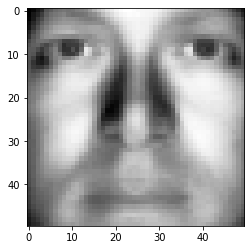

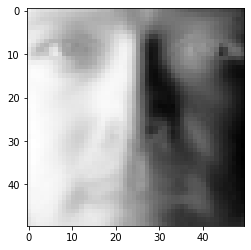

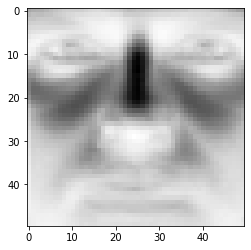

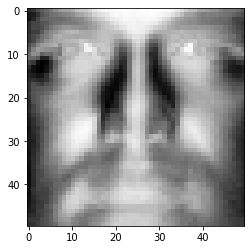

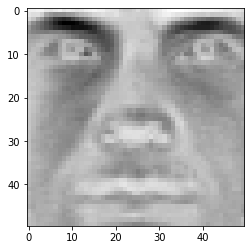

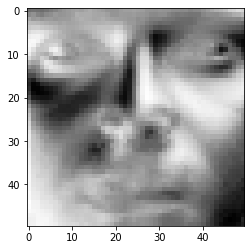

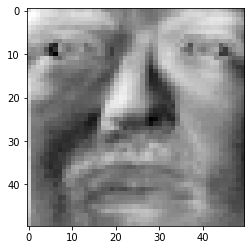

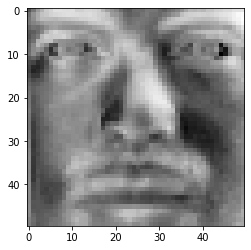

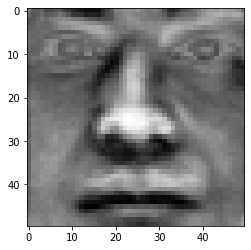

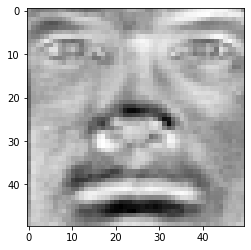

In [ ]:
for i in range(10):
  plot_face(eigenvectors[i])

## f. Eigenface Feature

In [ ]:
def r_feature_matrix(r, X):
  Vt = get_eigenvectors(X)[:r]
  F = np.dot(X, Vt.transpose())

  return F


In [ ]:
r_feature_matrix(3, train_subtracted).shape

(540, 3)

## g. Face Recognition

In [78]:
features_10_train = r_feature_matrix(10, train_subtracted)
features_10_test = r_feature_matrix(10, test_subtracted)

In [79]:
features_10_train

array([[-3071.98503336,  -440.55436121,   127.39265075, ...,
          178.04529608,  -119.05731126,    30.29017967],
       [ 2197.05744965,  -760.60052365,   562.46174352, ...,
          182.9450855 ,   113.96838521,  -384.43352369],
       [ 2473.33262159,   163.06716256,  -608.22806399, ...,
          -85.3894248 ,  -584.65403477,  -325.92945615],
       ...,
       [ 1841.10091761,  1907.14587095,   226.44323   , ...,
           51.07709295,    33.22865825,    26.8049682 ],
       [-2586.30249394,   163.15381029,   151.68973865, ...,
         -265.28513326,   144.82934451,  -105.81505369],
       [ 1363.71276667,  2930.60526623, -1287.14464964, ...,
          311.35304262,   162.68186295,  -198.41107223]])

In [80]:
features_10_test

array([[ 1.85844067e+03, -8.38453574e+02, -1.57750105e+03,
        -3.19008848e+02, -1.15351155e+02, -2.06442258e+02,
        -4.87813524e+02, -5.86954275e+02, -2.64052582e+01,
         4.34697899e+02],
       [-2.00611781e+02, -1.96113891e+03,  7.85057600e+02,
         1.27523398e+02,  8.21980471e+01, -1.00032904e+01,
         2.76506683e+02,  3.58024463e+01, -2.51962820e+01,
         7.23721803e+01],
       [-2.63299407e+03,  1.20148980e+03,  3.14445763e+01,
        -4.37659065e+02,  9.09254555e+01, -6.41471441e+01,
         6.14813825e+01,  6.37357992e+01, -2.63515405e+02,
         1.47052592e+02],
       [-2.39420333e+03,  1.44002933e+03, -5.52381523e+02,
        -7.95117949e+02, -4.25496401e+01, -1.12952149e+01,
         3.90951322e+02,  4.02498176e+02, -5.25852293e+01,
         3.11777031e+02],
       [ 3.28343048e+03, -2.86766916e+02, -1.45504480e+01,
        -2.24990314e+02,  1.70017981e+02, -8.39278160e+01,
         6.13245558e+01, -2.92796758e+02,  1.16439821e+02,
         2.

In [ ]:
from sklearn.linear_model import LogisticRegression

r_list = range(1,201)
accuracies = []

for r in r_list:
  F_train = r_feature_matrix(r, train_subtracted)
  F_test = r_feature_matrix(r, test_subtracted)
  log_reg = LogisticRegression(penalty='l2', 
                               multi_class='ovr', 
                               solver='liblinear', 
                               max_iter=1000,
                               verbose=True).fit(F_train, train_labels)
  accuracy = log_reg.score(F_test, test_labels)
  accuracies.append(accuracy)
  print(accuracy)

[LibLinear]0.13
[LibLinear]0.18
[LibLinear]0.13
[LibLinear]0.13
[LibLinear]0.06
[LibLinear]0.06
[LibLinear]0.11
[LibLinear]0.08
[LibLinear]0.08
[LibLinear]0.05
[LibLinear]0.07
[LibLinear]0.09
[LibLinear]0.12
[LibLinear]0.14
[LibLinear]0.11
[LibLinear]0.11
[LibLinear]0.13
[LibLinear]0.11
[LibLinear]0.1
[LibLinear]0.12
[LibLinear]0.14
[LibLinear]0.13
[LibLinear]0.13
[LibLinear]0.15
[LibLinear]0.15
[LibLinear]0.15
[LibLinear]0.18
[LibLinear]0.16
[LibLinear]0.16
[LibLinear]0.16
[LibLinear]0.14
[LibLinear]0.13
[LibLinear]0.12
[LibLinear]0.14
[LibLinear]0.16
[LibLinear]0.15
[LibLinear]0.11
[LibLinear]0.13
[LibLinear]0.12
[LibLinear]0.13
[LibLinear]0.13
[LibLinear]0.14
[LibLinear]0.11
[LibLinear]0.1
[LibLinear]0.11
[LibLinear]0.11
[LibLinear]0.11
[LibLinear]0.11
[LibLinear]0.12
[LibLinear]0.13
[LibLinear]0.13
[LibLinear]0.13
[LibLinear]0.13
[LibLinear]0.13
[LibLinear]0.12
[LibLinear]0.11
[LibLinear]0.11
[LibLinear]0.08
[LibLinear]0.1
[LibLinear]0.07
[LibLinear]0.08
[LibLinear]0.08
[LibLinear]

In [29]:
len(accuracies)

200

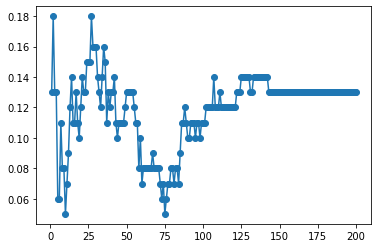

In [33]:
import matplotlib.pyplot as plt

rs = list(r_list)

plt.scatter(rs, accuracies)
plt.plot(rs, accuracies)

# 2. Implementation of EM Algorithm

In [123]:
geyser_df = pd.read_csv("data.csv", low_memory=False)
geyser_df

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


## a. Plotting the Data

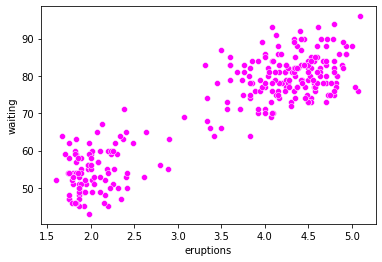

In [153]:
import seaborn as sns

sns.scatterplot(data=geyser_df, x='eruptions', y='waiting', color='magenta')

In [154]:
k = 2
X = geyser_df.to_numpy()
attr = geyser_df.shape[1]

mu = np.mean(X, axis=0)
cov = np.dot((X - mu).T, X - mu) / (X.shape[0] - 1)

In [155]:
from sklearn.cluster import KMeans


def initialize_clusters(X, n_clusters):
    clusters = []
    idx = np.arange(X.shape[0])
    
    # Instead of randomising the centroids, we use the KMeans centroids to initialise the GMM
    
    kmeans = KMeans(n_clusters).fit(X)
    mu_k = kmeans.cluster_centers_
    
    for i in range(n_clusters):
        clusters.append({
            'p_k': 1.0 / n_clusters,
            'mu_k': mu_k[i],
            'cov_k': np.identity(X.shape[1], dtype=np.float64)
        })
        
    return clusters

In [156]:
initialize_clusters(X, k)

[{'cov_k': array([[1., 0.],
         [0., 1.]]), 'mu_k': array([ 2.09433, 54.75   ]), 'p_k': 0.5},
 {'cov_k': array([[1., 0.],
         [0., 1.]]), 'mu_k': array([ 4.29793023, 80.28488372]), 'p_k': 0.5}]

In [157]:
def gaussian(X, mu, cov):
    n = X.shape[1]
    diff = (X - mu).T
    return np.diagonal(1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(cov) ** 0.5) * np.exp(-0.5 * np.dot(np.dot(diff.T, np.linalg.inv(cov)), diff))).reshape(-1, 1)

In [158]:
def expectation_step(X, clusters):
    totals = np.zeros((X.shape[0], 1), dtype=np.float64)
    
    for cluster in clusters:
        p_k = cluster['p_k']
        mu_k = cluster['mu_k']
        cov_k = cluster['cov_k']
        
        prob_nk = (p_k * gaussian(X, mu_k, cov_k)).astype(np.float64)
        
        for i in range(X.shape[0]):
            totals[i] += prob_nk[i]
        
        cluster['prob_nk'] = prob_nk
        cluster['totals'] = totals
        
    
    for cluster in clusters:
        cluster['prob_nk'] /= cluster['totals']

In [159]:
def maximization_step(X, clusters, iterations):
    N = float(X.shape[0])
  
    for cluster in clusters:
        prob_nk = cluster['prob_nk']
        cov_k = np.zeros((X.shape[1], X.shape[1]))
        
        N_k = np.sum(prob_nk, axis=0)
        
        p_k = N_k / N
        mu_k = np.sum(prob_nk * X, axis=0) / N_k
        
        for j in range(X.shape[0]):
            diff = (X[j] - mu_k).reshape(-1, 1)
            cov_k += prob_nk[j] * np.dot(diff, diff.T)
            
        cov_k /= N_k
        
        cluster['p_k'] = p_k
        cluster['mu_k'] = mu_k
        cluster['cov_k'] = cov_k

        if (iterations % 2 != 0):
          mu1_list.append(mu_k.tolist())
          iterations += 1

        else:
          mu2_list.append(mu_k.tolist())
          iterations += 1

In [160]:
def get_likelihood(X, clusters):
    sample_likelihoods = np.log(np.array([cluster['totals'] for cluster in clusters]))
    return np.sum(sample_likelihoods), sample_likelihoods

In [161]:
def train_gmm(X, n_clusters, n_epochs, iterations):
    clusters = initialize_clusters(X, n_clusters)
    likelihoods = np.zeros((n_epochs, ))
    scores = np.zeros((X.shape[0], n_clusters))
    history = []

    for i in range(n_epochs):
        clusters_snapshot = []
        
        # This is just for our later use in the graphs
        for cluster in clusters:
            clusters_snapshot.append({
                'mu_k': cluster['mu_k'].copy(),
                'cov_k': cluster['cov_k'].copy()
            })
            
        history.append(clusters_snapshot)
      
        expectation_step(X, clusters)
        maximization_step(X, clusters, iterations)

        likelihood, sample_likelihoods = get_likelihood(X, clusters)
        likelihoods[i] = likelihood

        print('Epoch: ', i + 1, 'Likelihood: ', likelihood)
        
    for i, cluster in enumerate(clusters):
        scores[:, i] = np.log(cluster['prob_nk']).reshape(-1)
        
    print(clusters_snapshot)
    return clusters, likelihoods, scores, sample_likelihoods, history

In [168]:
n_clusters = 2
n_epochs = 15
iterations = 0

mu1_list = []
mu2_list = []

clusters, likelihoods, scores, sample_likelihoods, history = train_gmm(X, n_clusters, n_epochs, iterations)

Epoch:  1 Likelihood:  -10278.645904361223
Epoch:  2 Likelihood:  -2286.8383029989445
Epoch:  3 Likelihood:  -2263.0589449231165
Epoch:  4 Likelihood:  -2260.6081249586086
Epoch:  5 Likelihood:  -2260.531696563181
Epoch:  6 Likelihood:  -2260.5281302248313
Epoch:  7 Likelihood:  -2260.5279324144913
Epoch:  8 Likelihood:  -2260.527921066055
Epoch:  9 Likelihood:  -2260.527920409839
Epoch:  10 Likelihood:  -2260.527920371822
Epoch:  11 Likelihood:  -2260.5279203696186
Epoch:  12 Likelihood:  -2260.5279203694913
Epoch:  13 Likelihood:  -2260.5279203694836
Epoch:  14 Likelihood:  -2260.5279203694836
Epoch:  15 Likelihood:  -2260.527920369483
[{'mu_k': array([ 2.03638845, 54.47851638]), 'cov_k': array([[ 0.06916767,  0.43516763],
       [ 0.43516763, 33.69728209]])}, {'mu_k': array([ 4.28966197, 79.96811518]), 'cov_k': array([[ 0.16996844,  0.94060931],
       [ 0.94060931, 36.04621126]])}]


In [163]:
print(clusters[0].get('mu_k'))
print(clusters[1].get('mu_k'))

[ 4.28966197 79.96811517]
[ 2.03638845 54.47851638]


In [165]:
clusters_list = []

for epochs in range(1,100):
  n_clusters = 2
  n_epochs = epochs
  iterations = 0

  mu1_list = []
  mu2_list = []

  clusters, likelihoods, scores, sample_likelihoods, history = train_gmm(X, n_clusters, n_epochs, iterations)
  clusters_list.append([clusters[0].get('mu_k'), clusters[1].get('mu_k')])

Epoch:  1 Likelihood:  -10278.645904361223
[{'mu_k': array([ 4.29793023, 80.28488372]), 'cov_k': array([[1., 0.],
       [0., 1.]])}, {'mu_k': array([ 2.09433, 54.75   ]), 'cov_k': array([[1., 0.],
       [0., 1.]])}]
Epoch:  1 Likelihood:  -10278.645904361223
Epoch:  2 Likelihood:  -2286.8383029989445
[{'mu_k': array([ 4.29793025, 80.28488394]), 'cov_k': array([[ 0.17761716,  0.76310109],
       [ 0.76310109, 31.48279262]])}, {'mu_k': array([ 2.09433004, 54.75000041]), 'cov_k': array([[ 0.15427875,  0.98566301],
       [ 0.98566301, 34.40750445]])}]
Epoch:  1 Likelihood:  -10278.645904361223
Epoch:  2 Likelihood:  -2286.8383029989445
Epoch:  3 Likelihood:  -2263.0589449231165
[{'mu_k': array([ 4.29801361, 80.0690595 ]), 'cov_k': array([[ 0.16162087,  0.8351641 ],
       [ 0.8351641 , 34.9013514 ]])}, {'mu_k': array([ 2.05166547, 54.63986866]), 'cov_k': array([[ 0.08602002,  0.61110061],
       [ 0.61110061, 35.2659445 ]])}]
Epoch:  1 Likelihood:  -10278.645904361223
Epoch:  2 Likeliho

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


Streaming output truncated to the last 5000 lines.
Epoch:  1 Likelihood:  -10278.645904361223
Epoch:  2 Likelihood:  -2286.8383029989445
Epoch:  3 Likelihood:  -2263.0589449231165
Epoch:  4 Likelihood:  -2260.6081249586086
Epoch:  5 Likelihood:  -2260.531696563181
Epoch:  6 Likelihood:  -2260.5281302248313
Epoch:  7 Likelihood:  -2260.5279324144913
Epoch:  8 Likelihood:  -2260.527921066055
Epoch:  9 Likelihood:  -2260.527920409839
Epoch:  10 Likelihood:  -2260.527920371822
Epoch:  11 Likelihood:  -2260.5279203696186
Epoch:  12 Likelihood:  -2260.5279203694913
Epoch:  13 Likelihood:  -2260.5279203694836
Epoch:  14 Likelihood:  -2260.5279203694836
Epoch:  15 Likelihood:  -2260.527920369483
Epoch:  16 Likelihood:  -2260.527920369483
Epoch:  17 Likelihood:  -2260.527920369483
Epoch:  18 Likelihood:  -2260.527920369483
Epoch:  19 Likelihood:  -2260.527920369483
Epoch:  20 Likelihood:  -2260.5279203694836
[{'mu_k': array([ 2.03638845, 54.47851638]), 'cov_k': array([[ 0.06916767,  0.43516762]

In [166]:
print(clusters_list)

[[array([ 4.29793025, 80.28488394]), array([ 2.09433004, 54.75000041])], [array([ 4.29801361, 80.0690595 ]), array([ 2.05166547, 54.63986866])], [array([ 4.29175822, 79.99160736]), array([ 2.03902353, 54.50872341])], [array([ 2.03695381, 54.4843352 ]), array([ 4.29015582, 79.97402058])], [array([ 4.28977936, 79.96953203]), array([ 2.0365214, 54.4798593])], [array([ 2.03642029, 54.47883692]), array([ 4.28969013, 79.96845562])], [array([ 2.03639611, 54.4785934 ]), array([ 4.28966875, 79.9681971 ])], [array([ 4.2896636, 79.9681349]), array([ 2.0363903 , 54.47853491])], [array([ 2.0363889 , 54.47852084]), array([ 4.28966237, 79.96811992])], [array([ 4.28966207, 79.96811632]), array([ 2.03638856, 54.47851745])], [array([ 4.289662  , 79.96811545]), array([ 2.03638848, 54.47851664])], [array([ 2.03638846, 54.47851644]), array([ 4.28966198, 79.96811524])], [array([ 2.03638846, 54.47851639]), array([ 4.28966197, 79.96811519])], [array([ 4.28966197, 79.96811518]), array([ 2.03638845, 54.47851638

In [134]:
len(mu1_list)
len(mu2_list)

15

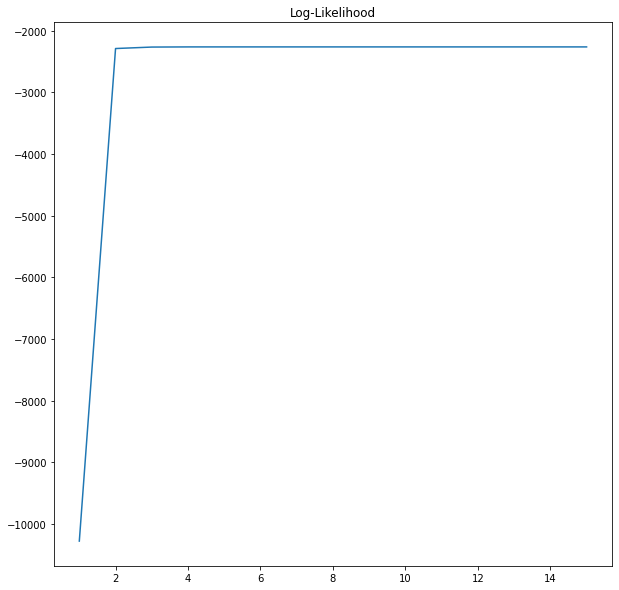

In [169]:
plt.figure(figsize=(10, 10))
plt.title('Log-Likelihood')
plt.plot(np.arange(1, n_epochs + 1), likelihoods)
plt.show()

In [170]:
mu1_list

[[4.2979302488235325, 80.28488394258054],
 [4.298013613252418, 80.06905949712986],
 [4.291758219582397, 79.99160735853599],
 [4.290155817819795, 79.97402058028105],
 [4.289779359310114, 79.96953203369316],
 [4.289690133455946, 79.96845562379498],
 [4.289668747050709, 79.96819709738108],
 [4.289663603677514, 79.96813489554665],
 [4.289662365663761, 79.96811992200894],
 [4.289662067611724, 79.96811631704021],
 [4.289661995852086, 79.9681154490953],
 [4.289661978574878, 79.96811524012426],
 [4.289661974415119, 79.96811518981117],
 [4.289661973413591, 79.96811517769753],
 [4.289661973172458, 79.96811517478096]]

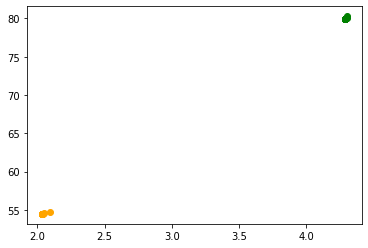

In [171]:
for i in range(len(mu1_list)):
  plt.scatter(mu1_list[i][0], mu1_list[i][1], color="green")
  plt.scatter(mu2_list[i][0], mu2_list[i][1], color="orange")

In [172]:
kmeans = KMeans(n_clusters=2).fit(X)
centers = kmeans.cluster_centers_

centers

array([[ 2.09433   , 54.75      ],
       [ 4.29793023, 80.28488372]])

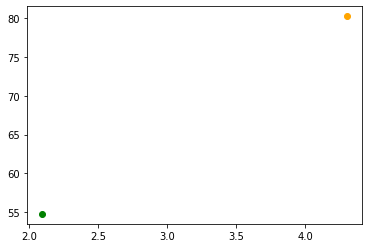

In [173]:
plt.scatter(centers[0][0], centers[0][1], color="green")
plt.scatter(centers[1][0], centers[1][1], color="orange")